Saving newssvm.csv to newssvm.csv
Index(['index', 'sno', 'title', 'text', 'category'], dtype='object')
   index      sno  title  text  category
0      0   8476.0    792   193         0
1      1  10294.0    735   277         0
2      2   3608.0    360   669         1
3      3  10142.0     74   777         0
4      4    875.0    619   360         1
['index' 'sno' 'title' 'text' 'category']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The size of our training "X" (input features) is (641, 4)


The size of our testing "X" (input features) is (161, 4)


The size of our training "y" (output feature) is (641,)


The size of our testing "y" (output features) is (161,)
------
428 : 1
441 : 0
695 : 1
731 : 0
99 : 1
170 : 0
425 : 0
799 : 0
749 : 0
751 : 0
685 : 0
261 : 1
252 : 1
465 : 0
426 : 0
724 : 0
212 : 1
606 : 1
325 : 1
475 : 1
701 : 1
148 : 0
550 : 0
756 : 0
322 : 1
512 : 1
283 : 1
336 : 1
308 : 0
352 : 0
112 : 0
46 : 1
692 : 1
729 : 1
775 : 0
317 : 0
210 : 1
376 : 1
254 : 1
631 : 0
552 : 0
60 : 0
196 : 1
708 : 0
679 : 1
693 : 1
710 : 1
243 : 1
424 : 0
364 : 1
591 : 1
653 : 1
705 : 1
587 : 0
472 : 1
138 : 1
437 : 0
634 : 1
519 : 1
582 : 1
78 : 0
65 : 1
533 : 1
517 : 0
182 : 1
530 : 1
380 : 1
600 : 1
748 : 1
172 : 0
427 : 1
765 : 1
626 : 1
712 : 0
630 : 1
386 : 1
81 : 1
564 : 0
331 : 1
9 : 1
109 : 0
671 : 1
218 : 1
288 : 1
635 : 0
282 : 0
49 : 0
45 : 0
233 : 1
573 : 0
614 : 1
41 : 1
377 : 1
136 : 0
179 : 0
433 : 0
178

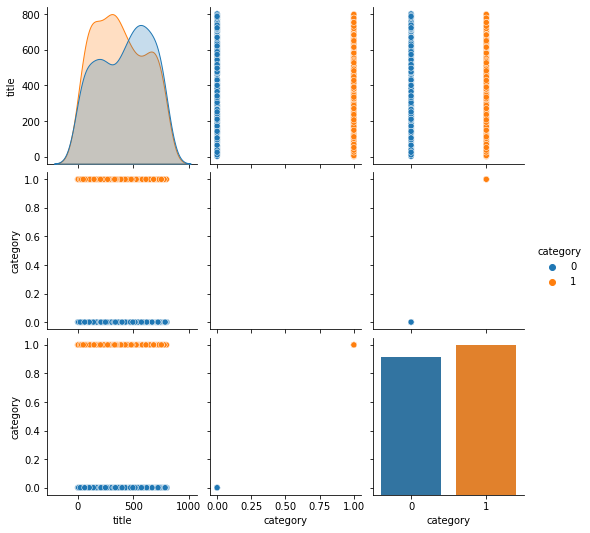

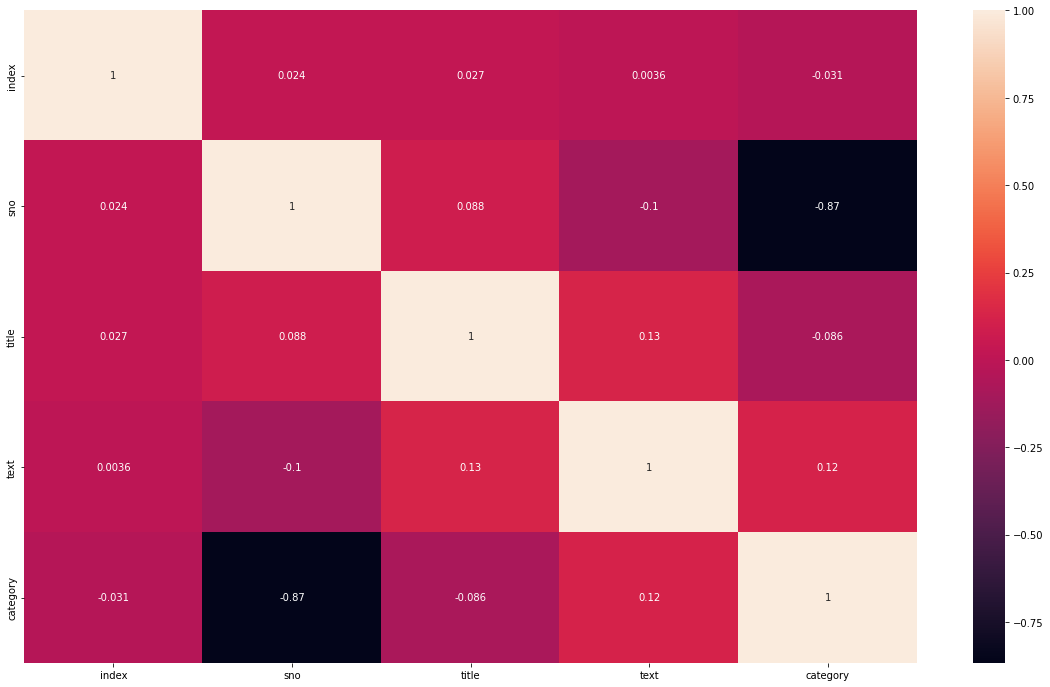

In [2]:
#!/usr/bin/env python
#python 3.7 32 bit 
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#get_ipython().run_line_magic('matplotlib', 'inline')

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

#from sklearn.datasets import load_breast_cancer
#cancer = load_breast_cancer()
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("newssvm.csv")
data.head()
cancer=data

data['title']=data['title'].str.replace("€", "")
data['title']=data['title'].str.replace("™", "")
data['title']=data['title'].str.replace("â", "")
data['text']=data['text'].str.replace("€", "")
data['text']=data['text'].str.replace("™", "")
data['text']=data['text'].str.replace("â", "")

data['text']=data['text'].str.replace(",", "")
data['title']=data['title'].str.replace(",", "")


data['category']=data['category'].astype('category')
data['title']=data['title'].astype('category')
data['text']=data['text'].astype('category')
data.replace(np.nan,0)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.reset_index()
# In[2]:


#print(cancer)
#print(cancer.columns)


# As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format.

# # Let's view the data in a dataframe.

# In[3]:


df = data#pd.DataFrame(np.c_[cancer['title'], cancer['category']], columns = np.append(cancer['category'], ['category']))

df.head()




df.shape


# As we can see,we have 596 rows (Instances) and 31 columns(Features)

# In[5]:


print(df.columns)
#df=df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
df['category']=df['category'].astype('category')
df['title']=df['title'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
print(df.head())
#exit()

# Above is the name of each columns in our dataframe.

# # The next step is to Visualize our data

# In[6]:


print(df.columns.values)
# Let's plot out just the first 5 variables (features)
sns.pairplot(df, hue = 'category', vars = ['title', 'category', 'category'])


# **Note:** 
#     
#   1.0 (Orange) = Benign (No Cancer)
#   
#   0.0 (Blue) = Malignant (Cancer)

# # How many Benign and Malignant do we have in our dataset?

# In[8]:


df['category'].value_counts()


# As we can see, we have 212 - Malignant, and 357 - Benign

#  Let's visulaize our counts

# In[9]:


sns.countplot(df['category'], label = "Count") 


# # Let's check the correlation between our features 

# In[10]:


plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(), annot=True) 




X = df.drop(['category'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()


# In[12]:


y = df['category']
y.head()


# # Create the training and testing data

# Now that we've assigned values to our "X" and "y", the next step is to import the python library that will help us to split our dataset into training and testing data.

# - Training data = Is the subset of our data used to train our model.
# - Testing data =  Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

# In[13]:


from sklearn.model_selection import train_test_split


# Let's split our data using 80% for training and the remaining 20% for testing.

# In[14]:

indices =range(len(df))
leng=len(df)
X_train, X_test, y_train, y_test,tr,te = train_test_split(X, y,indices, test_size = 0.2, random_state = 20)


# Let now check the size our training and testing data.

# In[15]:


print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

# # Import Support Vector Machine (SVM) Model 

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#iris = datasets.load_iris() 
#X, y = iris.data[:, :], iris.target
indices =range(len(df))
Xtrain, Xtest, y_train, y_test,tr,te = train_test_split(X, y, indices,stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)
# In[16]:
leng=len(te)
print("------");
for i in range(0,leng):
   print(te[i] , ":",  y_pred[i])
print('Accuracy Score:',end= ' ')
print(round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test, y_pred))
print('Confusion Matrix [KNN]')
print('----------------------')
print(confusion_matrix(y_test, y_pred))
exit()